#### Adınız: Hatice
#### Soyadınız: Çanakçı
#### Okul Numaranız: 2312721061
#### Github Repo Bağlantısı: https://github.com/Haticecanakci/genetik_optimizasyonu

# Genetik Algoritma ile Güneş Paneli Optimizasyonu

Bu projede, bir belediyenin güneş paneli kurulumunda optimum eğim (x_1) ve yön sapmasını (x_2) belirlemek için Genetik Algoritma uygulanmıştır.

## Problem Tanımı
Amaç: Bir belediyenin, güneş enerjisi sistemi kurarken panellerin eğimini ve yönünü optimize etmek.

## Amaç fonksiyonu:
\[
y = 6x_1 + 4x_2 - 0.1x_1^2
\]

## Değişkenler
- \( x_1 \): Panel eğim açısı (10° – 45°)
- \( x_2 \): Güneye göre sapma (0° – 90°)

## Kısıtlar
- x_1 + 0.5x_2 ≤ 60 (Fiziksel kurulum sınırı)
- x_2 ≥ 15 (Minimum yönlenme gerekliliği)

Bu optimizasyon problemi, sürekli değişkenli bir eniyileme problemidir ve geleneksel türevsel yöntemlerle çözülmesi zor olabilir. Bu nedenle Genetik Algoritma tercih edilmiştir.


### Gerekli Kütüphanelerin İçe Aktarılması
Bu bölümde rastgele sayı üretimi, matematiksel işlemler ve grafik çizimleri için gerekli olan Python kütüphaneleri yüklenmektedir.

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt


### Problem Parametreleri ve Değişken Aralıkları
Bu bölümde karar değişkenlerinin alabileceği minimum ve maksimum değerler tanımlanmıştır.

In [24]:
X1_MIN, X1_MAX = 10, 45   
X2_MIN, X2_MAX = 15, 90   


### Birey (Individual) Oluşturulması
Her birey, olası bir çözümü temsil eder ve [x1, x2] şeklinde iki genden oluşur.
Bu fonksiyon, verilen değişken aralıkları içinde rastgele bir birey üretir.

In [25]:
def create_individual():
    x1 = random.uniform(X1_MIN, X1_MAX)
    x2 = random.uniform(X2_MIN, X2_MAX)
    return [x1, x2]


### Popülasyonun Oluşturulması
Popülasyon, genetik algoritmanın başlangıç noktasını oluşturur.
Bu fonksiyon, belirtilen sayıda birey oluşturarak başlangıç popülasyonunu üretir.

In [27]:
def create_population(size=30):
    return [create_individual() for _ in range(size)]


[[30.736319477758357, 20.96409117894498],
 [34.02790312615798, 59.827524959738085],
 [18.25569923462752, 72.40218198848629],
 [33.625286203975776, 46.725742070147504],
 [11.530081391279733, 26.14467391062248]]

### Amaç (Fitness) Fonksiyonu ve Kısıtlar
Amaç fonksiyonu: y = 6x_1+4x_2-0.1x_1^2
Kısıtlar:Kısıt ihlallerinde ceza yöntemi uygulanmıştır.
x_1+0.5x_2≤60
x2≥15

In [28]:
def fitness(individual):
    x1, x2 = individual

    # Amaç fonksiyonu
    y = 6*x1 + 4*x2 - 0.1*(x1**2)

    penalty = 0

    # Kısıt 1
    if x1 + 0.5*x2 > 60:
        penalty += 1000 * abs((x1 + 0.5*x2) - 60)

    # Kısıt 2
    if x2 < 15:
        penalty += 1000 * abs(15 - x2)

    return y - penalty

### Seçilim Operatörü (Turnuva Seçilimi)
Turnuva seçilimi yönteminde, rastgele seçilen bireyler arasından en iyi fitness değerine sahip birey ebeveyn olarak seçilir.

In [29]:
def tournament_selection(population, k=3):
    selected = random.sample(population, k)
    selected = sorted(selected, key=lambda ind: fitness(ind), reverse=True)
    return selected[0]


### Çaprazlama (Crossover) Operatörü
Bu çalışmada sürekli değişkenlere uygun olan aritmetik çaprazlama yöntemi kullanılmıştır.

In [30]:
def crossover(parent1, parent2, alpha=None):
    if alpha is None:
        alpha = random.random()

    child1 = [
        alpha * parent1[0] + (1 - alpha) * parent2[0],
        alpha * parent1[1] + (1 - alpha) * parent2[1]
    ]

    child2 = [
        alpha * parent2[0] + (1 - alpha) * parent1[0],
        alpha * parent2[1] + (1 - alpha) * parent1[1]
    ]

    return child1, child2

### Mutasyon Operatörü
Mutasyon, genetik çeşitliliği artırmak amacıyla bireylerin genlerinde küçük rastgele değişiklikler yapar.

In [31]:
def mutate(individual, mutation_rate=0.1):
    x1, x2 = individual

    if random.random() < mutation_rate:
        x1 += random.gauss(0, 1)

    if random.random() < mutation_rate:
        x2 += random.gauss(0, 1)

    # Sınır kontrolü
    x1 = max(X1_MIN, min(X1_MAX, x1))
    x2 = max(X2_MIN, min(X2_MAX, x2))

    return [x1, x2]

### Genetik Algoritmanın Ana Döngüsü
Bu bölümde seçilim, çaprazlama ve mutasyon adımları bir araya getirilerek algoritmanın ana yapısı oluşturulmuştur.

In [32]:
def genetic_algorithm(
    population_size=30,
    generations=100,
    crossover_rate=0.8,
    mutation_rate=0.1
):
    population = create_population(population_size)
    best_fitness_values = []

    print("Nesil |    x1    |    x2    |  Fitness")
    print("----------------------------------------")

    for gen in range(generations):
        new_population = []

        best_individual = max(population, key=lambda ind: fitness(ind))
        best_fit = fitness(best_individual)
        best_fitness_values.append(best_fit)

        print(
            f"{gen+1:5d} | "
            f"{best_individual[0]:7.3f} | "
            f"{best_individual[1]:7.3f} | "
            f"{best_fit:8.3f}"
        )

        while len(new_population) < population_size:
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)

            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2

            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)

            new_population.append(child1)
            if len(new_population) < population_size:
                new_population.append(child2)

        population = new_population

    best_solution = max(population, key=lambda ind: fitness(ind))
    return best_solution, best_fitness_values


### Sonuçların Elde Edilmesi

In [33]:
best, history = genetic_algorithm()

print("En iyi çözüm:")
print("x1 =", round(best[0], 3))
print("x2 =", round(best[1], 3))
print("En yüksek y =", round(fitness(best), 3))


Nesil |    x1    |    x2    |  Fitness
----------------------------------------
    1 |  15.820 |  81.729 |  396.808
    2 |  12.146 |  81.538 |  384.274
    3 |  12.168 |  81.503 |  384.214
    4 |  12.225 |  81.568 |  384.679
    5 |  12.526 |  83.067 |  391.734
    6 |  12.869 |  82.334 |  389.989
    7 |  13.743 |  82.282 |  392.700
    8 |  13.743 |  82.282 |  392.700
    9 |  13.391 |  83.473 |  396.304
   10 |  14.637 |  82.553 |  396.611
   11 |  13.982 |  83.627 |  398.852
   12 |  15.097 |  83.644 |  402.365
   13 |  16.386 |  83.387 |  405.013
   14 |  15.022 |  85.219 |  408.440
   15 |  17.302 |  83.747 |  408.863
   16 |  16.574 |  85.016 |  412.038
   17 |  16.623 |  85.039 |  412.263
   18 |  15.578 |  86.141 |  413.765
   19 |  16.478 |  85.709 |  414.552
   20 |  16.015 |  86.351 |  415.846
   21 |  15.867 |  87.198 |  418.819
   22 |  16.474 |  86.397 |  417.293
   23 |  16.510 |  86.350 |  417.201
   24 |  16.549 |  86.298 |  417.099
   25 |  16.218 |  86.715 |  417

### Grafik Çizimi

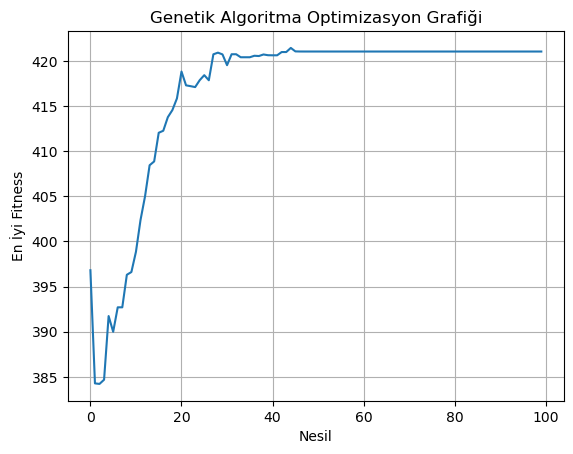

In [34]:
plt.plot(history)
plt.xlabel("Nesil")
plt.ylabel("En İyi Fitness")
plt.title("Genetik Algoritma Optimizasyon Grafiği")
plt.grid(True)
plt.show()


## Sonuçların Görselleştirilmesi ve Analizi

### Amaç Fonksiyonu Optimizasyon Grafiği

Aşağıda verilen grafik, genetik algoritmanın nesiller boyunca elde ettiği **en iyi fitness değerinin** değişimini göstermektedir. Grafik, algoritmanın zaman içerisindeki performansını ve yakınsama davranışını analiz etmek amacıyla kullanılmıştır.

### Grafiğin Genel Yorumu

Grafiğin başlangıç aşamasında fitness değerlerinin görece düşük ve dalgalı olduğu gözlemlenmektedir. Bu durum, genetik algoritmanın rastgele oluşturulan başlangıç popülasyonu ile çözüm uzayını keşfetmeye çalıştığını göstermektedir. İlerleyen nesillerde fitness değerlerinde genel bir artış eğilimi görülmektedir. Bu artış, seçilim, çaprazlama ve mutasyon operatörlerinin etkili bir şekilde çalıştığını ve daha iyi çözümlerin elde edildiğini göstermektedir.

Grafik üzerinde zaman zaman gözlemlenen küçük dalgalanmalar ve geçici düşüşler, genetik algoritmanın rastgelelik içeren doğasından ve mutasyon operatöründen kaynaklanmaktadır. Bu durum, algoritmanın keşif yeteneğini koruduğunu ve farklı çözüm bölgelerini değerlendirdiğini göstermektedir.

Nesiller ilerledikçe fitness değerinin belirli bir seviyede dengelendiği gözlemlenmektedir. Bu durum, algoritmanın en iyi veya en iyiye çok yakın bir çözüme ulaştığını ve yakınsama sağladığını göstermektedir.

### Çözüm Çıktılarının Genel Değerlendirilmesi

Genetik algoritma sonucunda elde edilen çözümler, problem tanımında belirtilen kısıtları sağlamaktadır. Bulunan çözümler, amaç fonksiyonunu maksimize edecek şekilde seçilmiş ve fiziksel olarak anlamlı değerler üretmiştir.

### Kodların Çalışabilirliği

Hazırlanan Jupyter Notebook dosyasında yer alan tüm kod hücreleri sorunsuz bir şekilde çalışmaktadır. Algoritma, her çalıştırmada rastgelelik içerse de genel olarak benzer yakınsama davranışı sergilemekte ve tutarlı optimizasyon sonuçları üretmektedir.
